In [1]:
import sys
from pathlib import Path
sys.path.append(f"{Path().absolute().parent}")

In [2]:
from radp.digital_twin.mobility.ue_tracks import UETracksGenerator,MobilityClass

In [3]:
mobility_class_distribution = {
    MobilityClass.stationary: 0.1,  # 10% of UEs are stationary
    MobilityClass.pedestrian: 0.3,  # 30% are pedestrians
    MobilityClass.cyclist: 0.2,     # 20% are cyclists
    MobilityClass.car: 0.4          # 40% are in cars
}


In [4]:
mobility_class_velocities = {
    MobilityClass.stationary: 0.0,   # Stationary UEs don't move
    MobilityClass.pedestrian: 1.5,   # Average walking speed in m/s
    MobilityClass.cyclist: 5.5,      # Average cycling speed in m/s
    MobilityClass.car: 13.9          # Average city driving speed in m/s
}


In [5]:
mobility_class_velocity_variances = {
    MobilityClass.stationary: 0.0,  # No variance for stationary
    MobilityClass.pedestrian: 0.5,  # Variance in walking speed
    MobilityClass.cyclist: 2.0,     # Variance in cycling speed
    MobilityClass.car: 4.0          # Variance in driving speed
}


In [14]:
import numpy as np

rng = np.random.default_rng()

ue_generator = UETracksGenerator(
    rng=rng,
    mobility_class_distribution=mobility_class_distribution,
    mobility_class_velocities=mobility_class_velocities,
    mobility_class_velocity_variances=mobility_class_velocity_variances,
    lon_x_dims=100,  # Width of the area in meters
    lon_y_dims=100,  # Height of the area in meters
    num_ticks=3,     # Number of simulation ticks
    num_UEs=5,       # Number of user equipments
    alpha = 0.2 
)


In [7]:
print(ue_generator.generate())


<generator object UETracksGenerator.generate at 0x1048d5360>


In [15]:
# Define how many batches you want to retrieve
number_of_batches = 1

# Collect batches
all_batches = []
for _ in range(number_of_batches):
    batch = next(ue_generator.generate())
    all_batches.append(batch)
    print("Retrieved batch:", batch)


Retrieved batch: [[array([ 3.59923172, 61.28888275]), array([41.81724432, 53.60213639]), array([18.50704514, 53.21344635]), array([46.12381252, 23.9108904 ]), array([46.80107185, 16.01831497])], [array([ 4.11139558, 60.93735224]), array([42.38978065, 55.68458386]), array([19.201256  , 53.81844925]), array([41.79748385, 27.10723416]), array([53.14434795,  8.30990956])], [array([ 3.63353504, 62.02367047]), array([42.69150638, 56.54638235]), array([19.24793699, 53.46023516]), array([36.73388646, 32.21271354]), array([63.37586313,  8.10200904])]]


In [16]:
for i, batch in enumerate(all_batches):
    # Process each batch of tracks
    # For example, you might want to visualize the tracks or analyze movement patterns
    print(f"Processing batch {i+1}")
    for tick_tracks in batch:
        # Assuming each batch contains tracks for each tick
        # tick_tracks would be a list of (x, y) positions
        print(f"Tick {i+1} has {len(tick_tracks)} tracks")


Processing batch 1
Tick 1 has 5 tracks
Tick 1 has 5 tracks
Tick 1 has 5 tracks


In [19]:
import matplotlib.pyplot as plt

def plot_ue_tracks(batches):
    """
    Plots the tracks of UEs from a list of batches generated by UETracksGenerator.

    Args:
    - batches: List of lists, where each inner list contains (x, y) coordinates for one batch.

    Each batch will be plotted in a separate figure.
    """
    for i, batch in enumerate(batches):
        plt.figure(figsize=(10, 10))  # Set the figure size for each batch plot
        plt.title(f'Batch {i + 1} Mobility Tracks')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')

        for tick_index, tick_tracks in enumerate(batch):
            x_coords, y_coords = zip(*tick_tracks)  # Unpack the list of tuples into separate x and y coordinate lists
            plt.scatter(x_coords, y_coords, alpha=0.5, label=f'Tick {tick_index + 1}')
        
        plt.legend()
        plt.grid(True)
        plt.show()

# Example usage:
# Assuming `all_batches` is a list of batches where each batch contains lists of (x, y) coordinates for each tick
# plot_ue_tracks(all_batches)


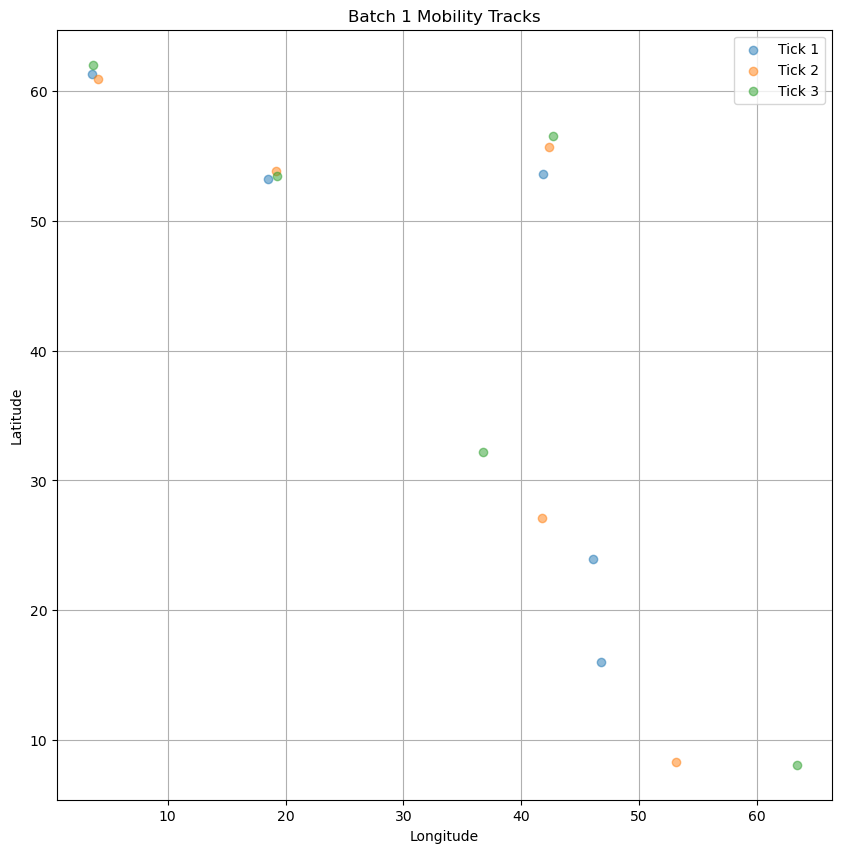

In [20]:
plot_ue_tracks(all_batches)


In [17]:
import matplotlib.pyplot as plt

def plot_ue_tracks_line(batches):
    """
    Plots the tracks of UEs from a list of batches generated by UETracksGenerator as line graphs.

    Args:
    - batches: List of lists, where each inner list contains (x, y) coordinates for one batch.

    Each batch will be plotted in a separate figure.
    """
    for i, batch in enumerate(batches):
        plt.figure(figsize=(10, 10))  # Set the figure size for each batch plot
        plt.title(f'Batch {i + 1} Mobility Tracks')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        
        # Assume all ticks share the same UEs and only their positions change
        num_ticks = len(batch)
        num_UEs = len(batch[0])  # Number of UEs assumed to be the same for all ticks in the batch

        # Organize data by UE
        for ue_index in range(num_UEs):
            x_coords = [batch[tick_index][ue_index][0] for tick_index in range(num_ticks)]
            y_coords = [batch[tick_index][ue_index][1] for tick_index in range(num_ticks)]
            
            plt.plot(x_coords, y_coords, marker='o', linestyle='-', alpha=0.6, label=f'UE {ue_index + 1}')

        plt.legend()
        plt.grid(True)
        plt.show()

# Example usage:
# Assuming `all_batches` is a list of batches where each batch contains lists of (x, y) coordinates for each tick
# plot_ue_tracks_line(all_batches)


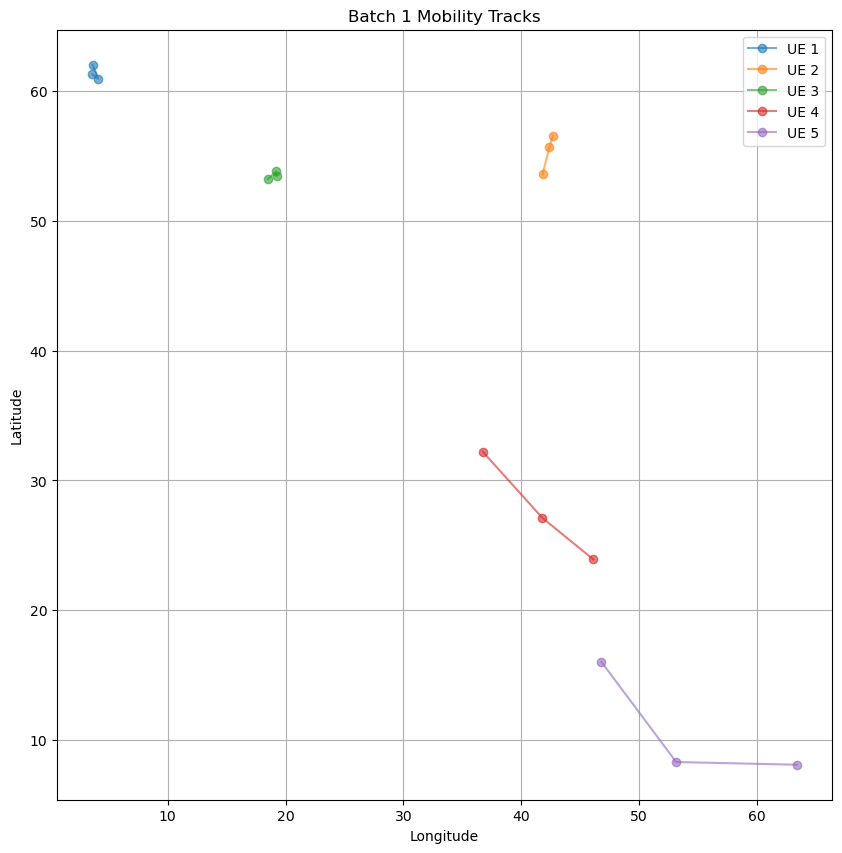

In [18]:
plot_ue_tracks_line(all_batches)